# **Assignment 1 - Introduction to Machine Learning**

Name &emsp;&emsp;&emsp;: Matthew Alfredo <br/>
Student ID &emsp;: 202209134

## 1a. Linear Regression - Univariate

Simple linear regression using two columns in the given dataset House Rent. **Rent** will act as a dependent feature or the label and **Size** will act as an independent feature.

In [1]:
import time

import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd

In [2]:
def mean_squared_error(y_real, y_predicted):
  return np.mean( (y_real - y_predicted) ** 2 )

In [3]:
def r_squared_error(y_real, y_predicted):
    y_average = y_real.mean()
    ss_tot = ((y_real - y_average) ** 2).sum()
    ss_res = ((y_real - y_predicted) ** 2).sum()
    return 1 - (ss_res/ss_tot)

In [4]:
class LinearRegression:
    def __init__(self, learning_rate=0.00000005, iterations=100):
        self.cost_list = None
        self.loss_list = None
        self.thetas_list = None
        self.bias_list = None
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.thetas = None
        self.bias = None

    def fit(self, X, y):
        no_samples, no_features = X.shape

        # init parameters
        self.thetas = np.zeros((2, 1))
        self.bias = 0
        self.cost_list = []
        self.loss_list = []
        self.thetas_list = []
        self.bias_list = []

        # gradient descent
        for _ in range(self.iterations):
            y_predicted = np.dot(X, self.thetas) + self.bias

            # cost value
            cost = (1/(2*no_samples)) * np.sum(np.square(y_predicted - y))
            self.cost_list.append(cost)

            # loss value
            loss = mean_squared_error(y, y_predicted)
            self.loss_list.append(loss)

            # compute gradients
            dw = (1 / no_samples) * np.dot(X.T, y_predicted - y)
            db = (1 / no_samples) * np.sum(y_predicted - y)

            # update parameters
            self.thetas = self.thetas - self.learning_rate * dw
            self.bias = self.bias - self.learning_rate * db

            self.thetas_list.append(self.thetas)
            self.bias_list.append(self.bias)

    def predict(self, X):
        y_prediction = np.dot(X, self.thetas) + self.bias
        return y_prediction

In [5]:
data = np.loadtxt("House_Rent_Fixed_2_NoLabel.csv", delimiter=",")

In [6]:
X = data[:, 2]
y = data[:, 3]

print(X)
print(y)

[  60.  160.  200. ... 4800. 4341. 3500.]
[  2000.   3000.   3000. ... 130000. 130000. 130000.]


In [7]:
features = X
label = y

In [8]:
X = np.vstack((np.ones((X.size, )), X)).T
X

array([[1.000e+00, 6.000e+01],
       [1.000e+00, 1.600e+02],
       [1.000e+00, 2.000e+02],
       ...,
       [1.000e+00, 4.800e+03],
       [1.000e+00, 4.341e+03],
       [1.000e+00, 3.500e+03]])

In [9]:
y = data[:, 3].reshape(y.size, 1)
y

array([[  2000.],
       [  3000.],
       [  3000.],
       ...,
       [130000.],
       [130000.],
       [130000.]])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.2, random_state=1
)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2164, 2) (2164, 1)
(542, 2) (542, 1)


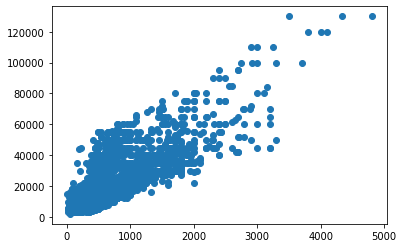

In [11]:
plt.scatter(X[:, 1], y)
plt.show()

In [12]:
linear_regression = LinearRegression(learning_rate=0.000001, iterations=1000000)
linear_regression.fit(X_train, y_train)

In [13]:
y_pred = linear_regression.predict(X_test)

# calculating mse
mse = mean_squared_error(y_test, y_pred)
print('MSE for Test Data:', mse)

# calculating r squared
rse = r_squared_error(y_test, y_pred)
print('R-Squared Error for Test Data:', rse)

MSE for Test Data: 138834687.47751236
R-Squared Error for Test Data: 0.4791791908220554


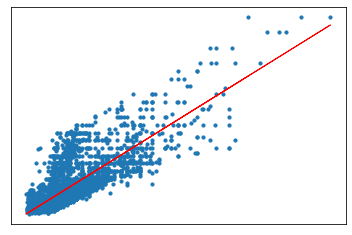

<Figure size 432x288 with 0 Axes>

In [14]:
y_pred_line = linear_regression.predict(X)
m1 = plt.scatter(features, label, s=10)
plt.plot(features, y_pred_line, color='red', linewidth=1, label="Prediction")
plt.xticks(())
plt.yticks(())
plt.show()
plt.clf()

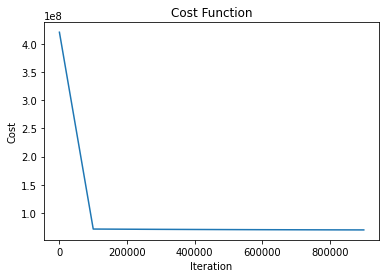

In [15]:
range_iteration = np.arange(0, linear_regression.iterations, 100000)
plt.plot(range_iteration, linear_regression.cost_list[0:linear_regression.iterations:100000])
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title('Cost Function')
plt.show()

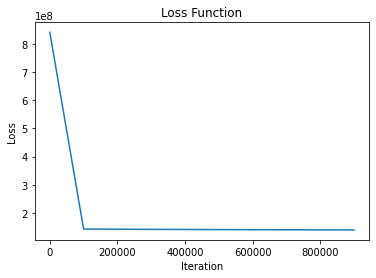

In [16]:
range_iteration = np.arange(0, linear_regression.iterations, 100000)
plt.plot(range_iteration, linear_regression.loss_list[0:linear_regression.iterations:100000])
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title('Loss Function')
plt.show()

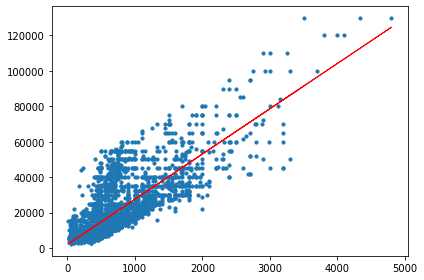

In [17]:
fig, ax = plt.subplots()
fig.set_tight_layout(True)

x = features
y_pred_line = linear_regression.predict(X)
line, = ax.plot(features, y_pred_line, color='red', linewidth=1, label="Prediction")
ax.scatter(features, label, s=10)
cost = 'Cost: -'
loss = 'Loss: -'

def update(i):
    if i % 10000 == 0:
        global cost, loss
        cost = 'Cost: ' + str(linear_regression.cost_list[i]) + ' - from Iteration ' + str(i)
        loss = 'Loss: ' + str(linear_regression.loss_list[i]) + ' - from Iteration ' + str(i)

    title = 'Iteration ' + str(i) + '\n' + cost + '\n' + loss
    line.set_ydata(np.dot(X, linear_regression.thetas_list[i]) + linear_regression.bias_list[i])
    ax.set_title(title)
    return line, ax

anim = animation.FuncAnimation(fig, update, repeat=False, frames=np.arange(0, linear_regression.iterations, 1000), interval=100)

# Writer = animation.writers['ffmpeg']
# writer = Writer(fps=30, metadata={'artist': 'Matthew Alfredo'}, bitrate=1800)

# anim.save('Linear Regression Univariate.mp4', writer=writer)

plt.show()

135575305.2544419


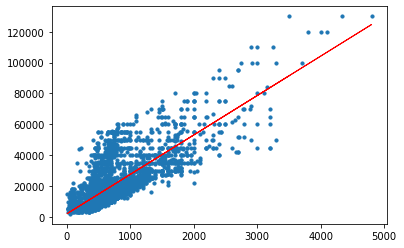

0.4914063518988918


In [18]:
# for comparison purpose
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

lr_predicted = lr.predict(X_test)

mse2 = mean_squared_error(y_test, lr_predicted)
print(mse2)

y_pred_line2 = linear_regression.predict(X)
fig2 = plt.figure()
m2 = plt.scatter(features, label, s=10)
plt.plot(features, y_pred_line2, color='red', linewidth=1, label="Prediction")
plt.show()

print(lr.score(X_test, y_test))



---



## 1b. Linear Regression - Multivariate

Simple linear regression using two columns in the given dataset about House Rent. **Rent** will act as a dependent feature or the label and **BHK, Size, Bathrooms** will act as independent features.

In [19]:
class LinearRegression2:
    def __init__(self, learning_rate=0.00000005, iterations=100):
        self.cost_list = None
        self.loss_list = None
        self.thetas_list = None
        self.bias_list = None
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.thetas = None
        self.bias = None

    def fit(self, X, y):
        no_samples, no_features = X.shape

        # init parameters
        self.thetas = np.zeros((no_features, 1))
        self.bias = 0
        self.cost_list = []
        self.loss_list = []
        self.thetas_list = []
        self.bias_list = []

        # gradient descent
        for _ in range(self.iterations):
            y_predicted = np.dot(X, self.thetas) + self.bias

            # cost value
            cost = (1 / (2 * no_samples)) * np.sum(np.square(y_predicted - y))
            self.cost_list.append(cost)

            # loss value
            loss = mean_squared_error(y, y_predicted)
            self.loss_list.append(loss)

            # compute gradients
            dw = (1 / no_samples) * np.dot(X.T, y_predicted - y)
            db = (1 / no_samples) * np.sum(y_predicted - y)

            # update parameters
            self.thetas = self.thetas - self.learning_rate * dw
            self.bias = self.bias - self.learning_rate * db

            self.thetas_list.append(self.thetas)
            self.bias_list.append(self.bias)

    def predict(self, X):
        y_prediction = np.dot(X, self.thetas) + self.bias
        return y_prediction

In [20]:
data = np.loadtxt('House_Rent_Fixed_2_NoLabel.csv', delimiter=',')
data

array([[2.000e+00, 1.000e+00, 6.000e+01, 2.000e+03],
       [1.000e+00, 1.000e+00, 1.600e+02, 3.000e+03],
       [1.000e+00, 1.000e+00, 2.000e+02, 3.000e+03],
       ...,
       [4.000e+00, 4.000e+00, 4.800e+03, 1.300e+05],
       [4.000e+00, 4.000e+00, 4.341e+03, 1.300e+05],
       [4.000e+00, 6.000e+00, 3.500e+03, 1.300e+05]])

In [21]:
X = data[:, 0:3]
y = data[:, 3]

print(X.shape, y.shape)

(2706, 3) (2706,)


In [22]:
X = np.vstack((np.ones((X.shape[0], )), X.T)).T
y = data[:, 3].reshape(y.size, 1)
print(X.shape, y.shape)

(2706, 4) (2706, 1)


In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2164, 4) (2164, 1)
(542, 4) (542, 1)


In [24]:
linear_regression2 = LinearRegression2(learning_rate=0.000001, iterations=1000000)

linear_regression2.fit(X_train, y_train)

In [25]:
y_pred = linear_regression2.predict(X_test)

# calculating mse
mse = mean_squared_error(y_test, y_pred)
print('MSE for Test Data:', mse)

# calculating r squared
rse = r_squared_error(y_test, y_pred)
print('R-Squared Error for Test Data:', rse)

MSE for Test Data: 129999353.29240608
R-Squared Error for Test Data: 0.582803356414058


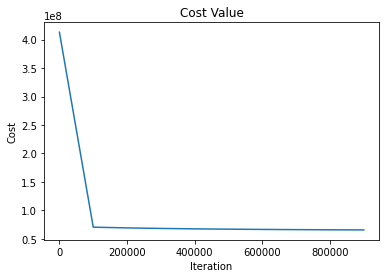

In [26]:
range_iteration = np.arange(0, linear_regression2.iterations, 100000)
plt.plot(range_iteration, linear_regression2.cost_list[0:linear_regression2.iterations:100000])
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title('Cost Value')
plt.show()

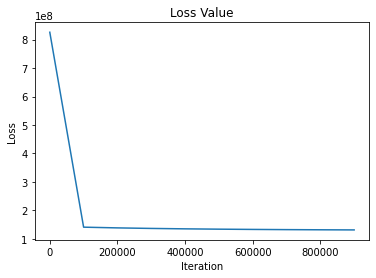

In [27]:
range_iteration = np.arange(0, linear_regression2.iterations, 100000)
plt.plot(range_iteration, linear_regression2.loss_list[0:linear_regression2.iterations:100000])
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title('Loss Value')
plt.show()

In [28]:
# for comparison purpose
from sklearn.linear_model import LinearRegression

lr2 = LinearRegression()
lr2.fit(X_train, y_train)

lr_predicted2 = lr2.predict(X_test)

mse4 = mean_squared_error(y_test, lr_predicted2)
print(mse4)

print(lr2.score(X_test, y_test))

123718015.00518596
0.6029615586226622




---



## 2. Logistic Regression

Classification of breast cancer using logistic regression. There will be 2 classes, Benign and Malignant.


In [68]:
class LogisticRegression:
    def __init__(self, learning_rate=0.0001, iterations=1000):
        self.cost_list = None
        self.loss_list = None
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        no_samples, no_features = X.shape
        self.loss_list = []
        self.weights = np.zeros(no_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self._sigmoid(linear_model)

            dw = (1 / no_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / no_samples) * np.sum(y_predicted - y)

            loss = self._loss(y, y_predicted)
            self.loss_list.append(loss)

            self.weights = self.weights - self.learning_rate * dw
            self.bias = self.bias - self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_prediction = self._sigmoid(linear_model)
        y_prediction_class = [1 if i > 0.5 else 0 for i in y_prediction]

        return y_prediction_class

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def _loss(self, y_real, y_pred):
        y_zero_loss = y_real * np.log(y_pred + 1e-9)
        y_one_loss = (1 - y_real) * np.log(1 - y_pred + 1e-9)
        return -(np.mean(y_zero_loss + y_one_loss))

In [100]:
# calculating accuracy based on number of correct predictions divided by number of total instances to be predicted
def accuracy_logistic(y_real, y_pred):
    accuracy = np.sum(y_real == y_pred) / len(y_real)
    return accuracy

# finding confusion matrix
def confusion_matrix(y_real, y_pred):
    K = len(np.unique(y_real))
    cm = np.zeros((K, K))

    for i in range(len(y_real)):
        cm[int(y_real[i])][int(y_pred[i])] += 1

    return cm

# precision is a metric where it calculates number of true positive divided by all instances predicted to be
# positive. cm is a confusion matrix
def precision(cm):
    true_positive = cm[0][0]
    false_positive = cm[1][0]
    return true_positive / (true_positive + false_positive)

# recall is a metric where it calculates number of correcly predicted positive instances divided by all instances
# that are actually positive in the dataset. cm is a confusion matrix
def recall(cm):
    true_positive = cm[0][0]
    false_negative = cm[0][1]
    return true_positive / (true_positive + false_negative)

# f1-score is taking both values of precision and recall into account, providing much broader metric.
def f1_score(cm):
    # p is precision value and r is recall value

    p = precision(cm)
    r = recall(cm)

    return (2 * p * r) / (p + r)

In [101]:
# read the data as pandas dataframe
data = pd.read_csv('breast_cancer.csv')

# drop columns that are not needed
data = data.drop(['id', 'Unnamed: 32'], axis=1)

# changing the string value to integer
data['diagnosis'] = data['diagnosis'].map({
    'M': 1,
    'B': 0
})

# change the type to numpy nd-array
data = data.values
data

array([[ 1.     , 17.99   , 10.38   , ...,  0.2654 ,  0.4601 ,  0.1189 ],
       [ 1.     , 20.57   , 17.77   , ...,  0.186  ,  0.275  ,  0.08902],
       [ 1.     , 19.69   , 21.25   , ...,  0.243  ,  0.3613 ,  0.08758],
       ...,
       [ 1.     , 16.6    , 28.08   , ...,  0.1418 ,  0.2218 ,  0.0782 ],
       [ 1.     , 20.6    , 29.33   , ...,  0.265  ,  0.4087 ,  0.124  ],
       [ 0.     ,  7.76   , 24.54   , ...,  0.     ,  0.2871 ,  0.07039]])

In [102]:
# X is for features or independent columns, from column 1 until 30
X = data[:, 1:31]

# y is for label or dependent column, from column 0
y = data[:, 0]

print(X.shape, y.shape)

(569, 30) (569,)


In [103]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(455, 30) (455,)
(114, 30) (114,)


In [104]:
logistic_regression = LogisticRegression(learning_rate=0.0001, iterations=1000)
logistic_regression.fit(X_train, y_train)

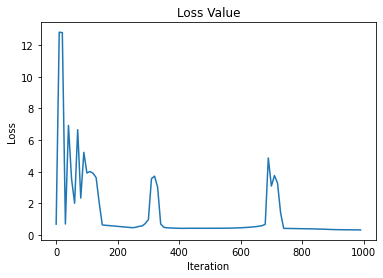

In [105]:
range_iteration = np.arange(0, logistic_regression.iterations, 10)
plt.plot(range_iteration, logistic_regression.loss_list[0:logistic_regression.iterations:10])
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title('Loss Value')
plt.show()

In [106]:
y_pred = logistic_regression.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[70.  2.]
 [ 5. 37.]]


In [108]:
print('Accuracy for test data:', accuracy_logistic(y_test, y_pred))
print('Precision for test data:', precision(cm))
print('Recall for test data:', recall(cm))
print('F1-Score for test data:', f1_score(cm))

Accuracy for test data: 0.9385964912280702
Precision for test data: 0.9333333333333333
Recall for test data: 0.9722222222222222
F1-Score for test data: 0.9523809523809524
